In [333]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score
import seaborn as sns

In [334]:
# Load Data
data = pd.read_csv('https://raw.githubusercontent.com/inidandi/tubes-mdp/main/healthcare-dataset-stroke-data.csv', delimiter=',', encoding='UTF-8')

# Menampilkan Data (5 baris pertama)
data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [335]:
# Mengecek informasi dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [336]:
# Menghitung jumlah nilai null yang ada dalam dataset
data.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [337]:
print('Nilai gender : ', pd.unique(data.gender))
print('Nilai Residence_type : ', pd.unique(data.Residence_type))
print('Nilai smoking_status : ', pd.unique(data.smoking_status))

print('Jumlah gender Other : ', (data.gender == 'Other').sum())
print('Jumlah gender Unknown : ', (data.smoking_status == 'Unknown').sum())

Nilai gender :  ['Male' 'Female' 'Other']
Nilai Residence_type :  ['Urban' 'Rural']
Nilai smoking_status :  ['formerly smoked' 'never smoked' 'smokes' 'Unknown']
Jumlah gender Other :  1
Jumlah gender Unknown :  1544


In [338]:
# Menghapus kolom id
data = data.drop(['id'], axis=1)

# Menghapus data dengan nilai gender Other
data = data.drop(index=data[data.gender == 'Other'].index)

# Menghapus data missing values dari seluruh dataset 
data = data.dropna()

# Mengecek informasi dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4908 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4908 non-null   object 
 1   age                4908 non-null   float64
 2   hypertension       4908 non-null   int64  
 3   heart_disease      4908 non-null   int64  
 4   ever_married       4908 non-null   object 
 5   work_type          4908 non-null   object 
 6   Residence_type     4908 non-null   object 
 7   avg_glucose_level  4908 non-null   float64
 8   bmi                4908 non-null   float64
 9   smoking_status     4908 non-null   object 
 10  stroke             4908 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 460.1+ KB


In [339]:
# Memberi Label untuk fitur atau atribut categorical
label_encoder = LabelEncoder()
data['gender'] = pd.DataFrame(label_encoder.fit_transform(data['gender']), index=data.index)
data['ever_married'] = pd.DataFrame(label_encoder.fit_transform(data['ever_married']), index=data.index)
data['work_type'] = pd.DataFrame(label_encoder.fit_transform(data['work_type']), index=data.index)
data['Residence_type'] = pd.DataFrame(label_encoder.fit_transform(data['Residence_type']), index=data.index)
data['smoking_status'] = pd.DataFrame(label_encoder.fit_transform(data['smoking_status']), index=data.index)

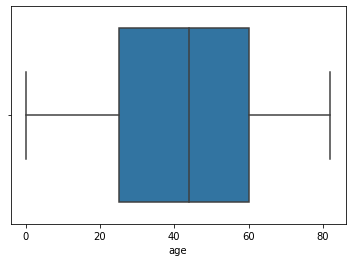

In [340]:
# Mengecek data outlier pada fitur age
sns.boxplot(x=data['age'])

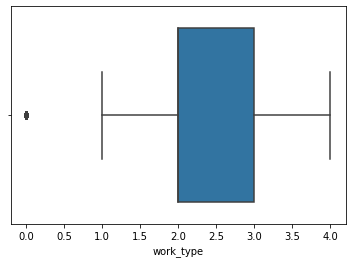

In [341]:
# Mengecek data outlier pada fitur work_type
sns.boxplot(x=data['work_type'])

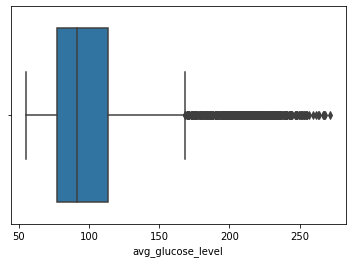

In [342]:
# Mengecek data outlier pada fitur avg_glucose_level
sns.boxplot(x=data['avg_glucose_level'])

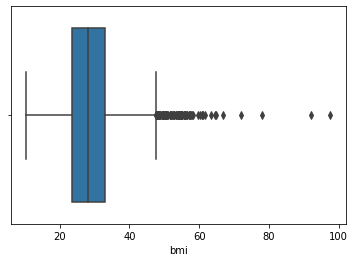

In [343]:
# Mengecek data outlier pada fitur bmi
sns.boxplot(x=data['bmi'])

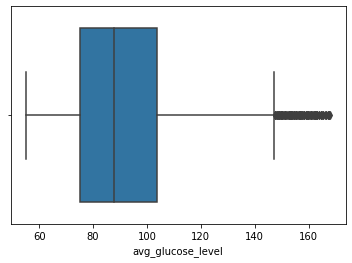

In [344]:
# Menghapus data outliers
Q1 = data['avg_glucose_level'].quantile(0.25)
Q3 = data['avg_glucose_level'].quantile(0.75)
IQR=Q3-Q1
data['avg_glucose_level']=data['avg_glucose_level'][~((data['avg_glucose_level']<(Q1-1.5*IQR))|(data['avg_glucose_level']>(Q3+1.5*IQR)))]

# Mengecek data outlier pada fitur avg_glucose_level
sns.boxplot(x=data['avg_glucose_level'])

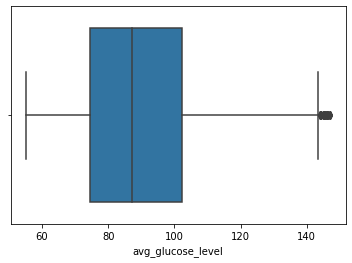

In [345]:
# Menghapus data outliers
Q1 = data['avg_glucose_level'].quantile(0.25)
Q3 = data['avg_glucose_level'].quantile(0.75)
IQR=Q3-Q1
data['avg_glucose_level']=data['avg_glucose_level'][~((data['avg_glucose_level']<(Q1-1.5*IQR))|(data['avg_glucose_level']>(Q3+1.5*IQR)))]

# Mengecek data outlier pada fitur avg_glucose_level
sns.boxplot(x=data['avg_glucose_level'])

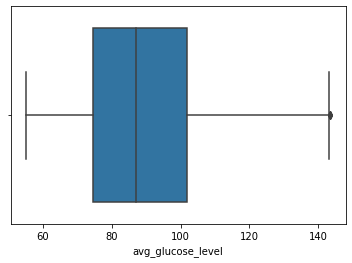

In [346]:
# Menghapus data outliers
Q1 = data['avg_glucose_level'].quantile(0.25)
Q3 = data['avg_glucose_level'].quantile(0.75)
IQR=Q3-Q1
data['avg_glucose_level']=data['avg_glucose_level'][~((data['avg_glucose_level']<(Q1-1.5*IQR))|(data['avg_glucose_level']>(Q3+1.5*IQR)))]

# Mengecek data outlier pada fitur avg_glucose_level
sns.boxplot(x=data['avg_glucose_level'])

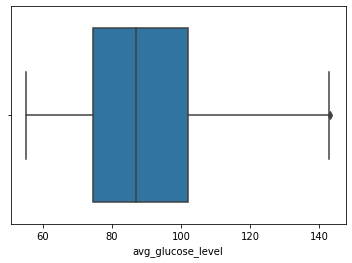

In [347]:
# Menghapus data outliers
Q1 = data['avg_glucose_level'].quantile(0.25)
Q3 = data['avg_glucose_level'].quantile(0.75)
IQR=Q3-Q1
data['avg_glucose_level']=data['avg_glucose_level'][~((data['avg_glucose_level']<(Q1-1.5*IQR))|(data['avg_glucose_level']>(Q3+1.5*IQR)))]

# Mengecek data outlier pada fitur avg_glucose_level
sns.boxplot(x=data['avg_glucose_level'])

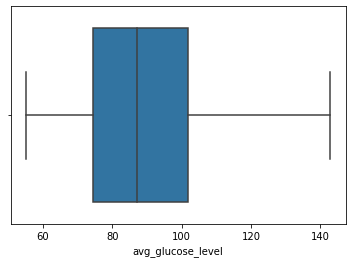

In [348]:
# Menghapus data outliers
Q1 = data['avg_glucose_level'].quantile(0.25)
Q3 = data['avg_glucose_level'].quantile(0.75)
IQR=Q3-Q1
data['avg_glucose_level']=data['avg_glucose_level'][~((data['avg_glucose_level']<(Q1-1.5*IQR))|(data['avg_glucose_level']>(Q3+1.5*IQR)))]

# Mengecek data outlier pada fitur avg_glucose_level
sns.boxplot(x=data['avg_glucose_level'])

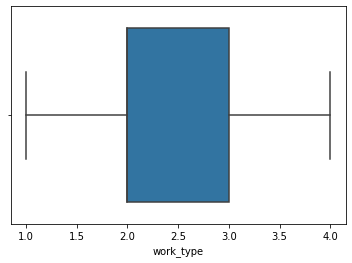

In [349]:
Q1 = data['work_type'].quantile(0.25)
Q3 = data['work_type'].quantile(0.75)
IQR=Q3-Q1
data['work_type']=data['work_type'][~((data['work_type']<(Q1-1.5*IQR))|(data['work_type']>(Q3+1.5*IQR)))]

# Mengecek data outlier pada fitur work_type
sns.boxplot(x=data['work_type'])

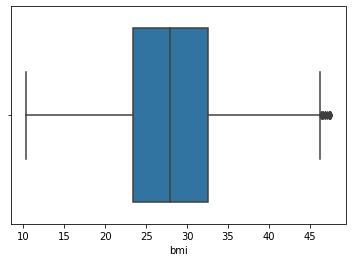

In [350]:
Q1 = data['bmi'].quantile(0.25)
Q3 = data['bmi'].quantile(0.75)
IQR=Q3-Q1
data['bmi']=data['bmi'][~((data['bmi']<(Q1-1.5*IQR))|(data['bmi']>(Q3+1.5*IQR)))]

# Mengecek data outlier pada fitur bmi
sns.boxplot(x=data['bmi'])

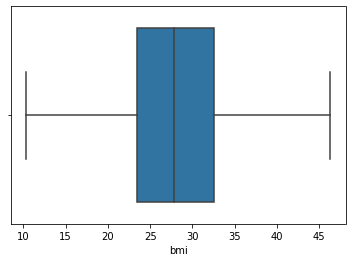

In [351]:
Q1 = data['bmi'].quantile(0.25)
Q3 = data['bmi'].quantile(0.75)
IQR=Q3-Q1
data['bmi']=data['bmi'][~((data['bmi']<(Q1-1.5*IQR))|(data['bmi']>(Q3+1.5*IQR)))]

# Mengecek data outlier pada fitur bmi
sns.boxplot(x=data['bmi'])

In [352]:
# menghapus nilai nulll
data = data.dropna()

# Melihat informasi dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3584 entries, 2 to 5107
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             3584 non-null   int64  
 1   age                3584 non-null   float64
 2   hypertension       3584 non-null   int64  
 3   heart_disease      3584 non-null   int64  
 4   ever_married       3584 non-null   int64  
 5   work_type          3584 non-null   float64
 6   Residence_type     3584 non-null   int64  
 7   avg_glucose_level  3584 non-null   float64
 8   bmi                3584 non-null   float64
 9   smoking_status     3584 non-null   int64  
 10  stroke             3584 non-null   int64  
dtypes: float64(4), int64(7)
memory usage: 336.0 KB


In [353]:
X = data.drop(['stroke'], axis=1)
Y = data['stroke']

# Membagi dataset menjadi data latih (train) dan data uji (test)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 43)

In [354]:
# membuat model Support Vector Classification (SVC)
svm = SVC()

# melakukan pelatihan model terhadap data
svm.fit(X_train, Y_train)

SVC()

In [355]:
# Mengukur skor akurasi pada data training
Y_pred_train = svm.predict(X_train)
print('accuracy_score : ', accuracy_score(Y_train, Y_pred_train))

accuracy_score :  0.9696546913149634


In [356]:
# Mengukur skor akurasi pada data testing
Y_pred_test = svm.predict(X_test)
print('accuracy_score : ', accuracy_score(Y_test, Y_pred_test))

accuracy_score :  0.9637377963737797


In [357]:
# TESTING DATA SEMBARANG
# 1. gender = 0 (Perempuan) & 1 (Laki-Laki)
# 2. age
# 3. hypertension = 0 (Tidak) & 1 (Ya)
# 4. heart_disease = 0 (Tidak) & 1 (Ya)
# 5. ever_married = 0 (Tidak) & 1 (Ya)
# 6. work_type = 0 (Govt_job) & 1 (Never_worked) & 2 (Private) & 3 (Self-employed) & 4 (children)
# 7. Residence_type = 0 (Rural) & 1 (Urban)
# 8. avg_glucose_level
# 9. bmi
# 10. smoking_status = 0 (Unknown) & 1 (formerly smoked) & 2 (never smoked) & 3 (smokes)

data_testing_sembarang = {
    'gender': [1],
    'age': [22],
    'hypertension': [1],
    'heart_disease': [1],
    'ever_married': [1],
    'work_type': [2],
    'Residence_type': [1],
    'avg_glucose_level': [172.87],
    'bmi': [26.4],
    'smoking_status': [1]
    }
svm.predict(pd.DataFrame(data_testing_sembarang))

array([0])